## k-means implementation
This file includes implementation of k-means method. To run this program choose which of the dataset that should be used and then proceed to execute all the other cells. First is the elbow method plot shown, then the scatter plots and lasts the confusion matrices.

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score


In [2]:
# variables for dataset 1
with open('../Datasets/A3-dataset1Modified.csv', 'r') as file:
   dataset = pd.read_csv('../Datasets/A3-dataset1Modified.csv', sep=',')

n_clusters_values = [2, 3, 4, 5, 6]  # list for confusion matrix

numberOfClusters = len(n_clusters_values)+1 # Obtained by running the elbow method, value of this variable is 4


In [5]:
with open('../Datasets/A3-dryBeansModified.csv', 'r') as file:
    dataset = pd.read_csv('../Datasets/A3-dryBeansModified.csv', sep=',')

n_clusters_values = [2, 3, 4, 5, 6, 7, 8]  # list for confusion matrix

numberOfClusters = len(n_clusters_values)+1 # Obtained by running the elbow method, alue of this variable is 6


/home/pavo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/pavo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/pavo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/pavo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

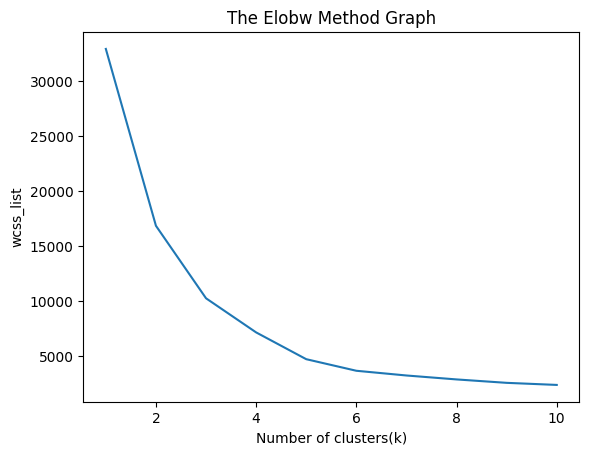

In [6]:
# Elbow method, shows what is the best value for number of clusters

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X) 

wcss_list = [] 

for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X_pca)
    wcss_list.append(kmeans.inertia_) 

plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.savefig('Output/Dataset2/ElbowMethod.png')
plt.show() 



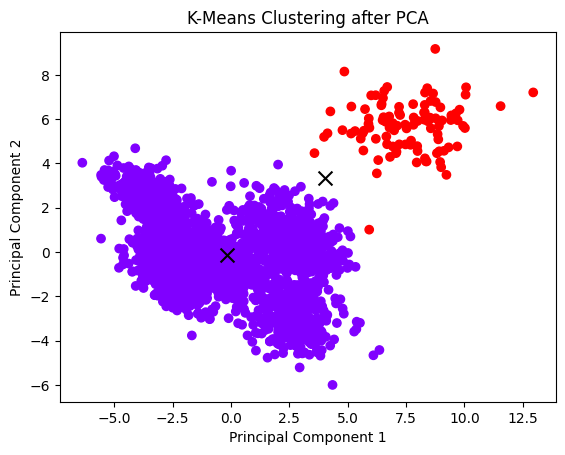

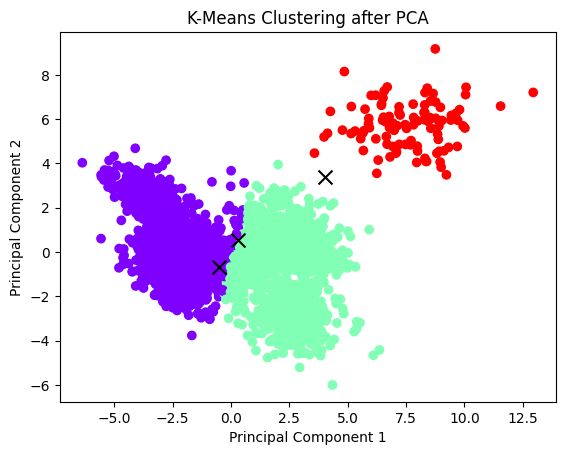

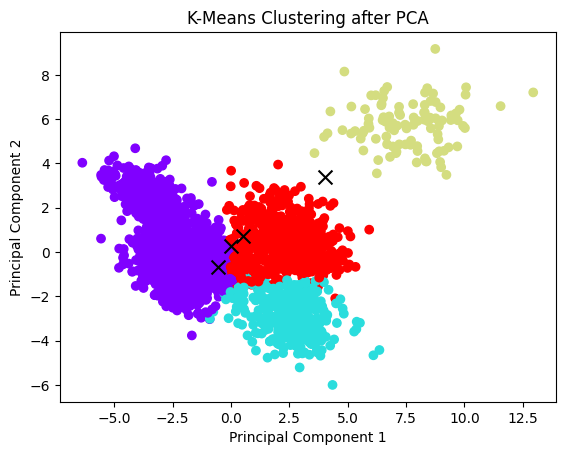

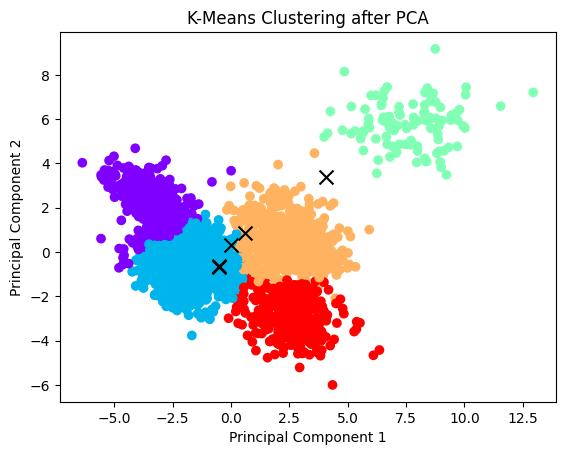

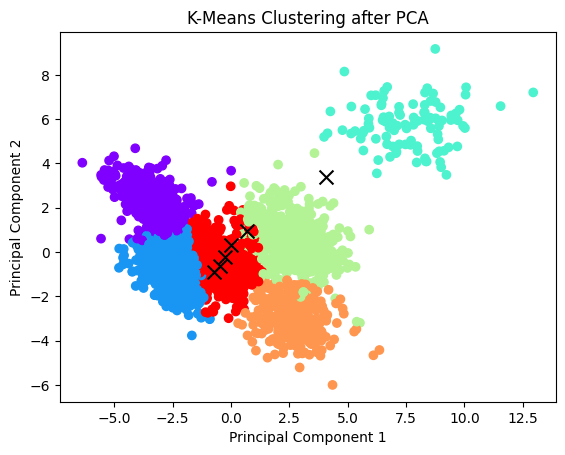

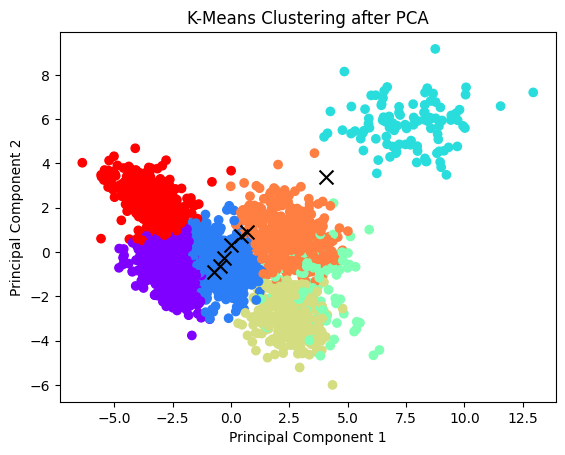

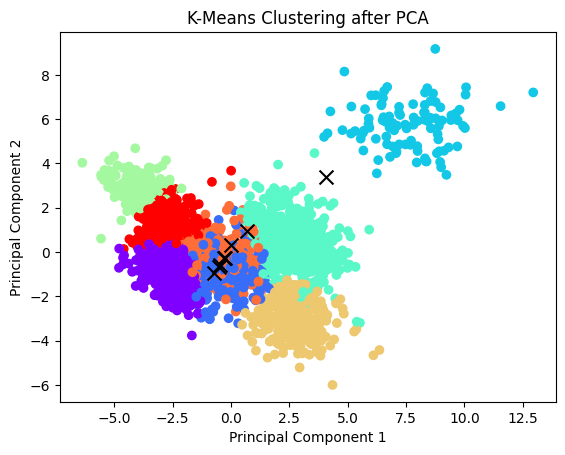

For value k: 2 ARI score is: 0.03521013718542705
For value k: 2 NMI score is: 0.16947907534919482

For value k: 3 ARI score is: 0.30300447034819494
For value k: 3 NMI score is: 0.4986736551608495

For value k: 4 ARI score is: 0.3945324145122267
For value k: 4 NMI score is: 0.5990054605054209

For value k: 5 ARI score is: 0.5597110798451901
For value k: 5 NMI score is: 0.695970533091013

For value k: 6 ARI score is: 0.6848610923163222
For value k: 6 NMI score is: 0.7327043018148877

For value k: 7 ARI score is: 0.6660595396042248
For value k: 7 NMI score is: 0.7112929157624024

For value k: 8 ARI score is: 0.561238920477438
For value k: 8 NMI score is: 0.664648275479119



In [7]:
# Creating k-means model and creating plot
ari_scoreList = []
nmi_scoreList = []

for i in range(2,numberOfClusters+1):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init="auto").fit(X)
    y_kmeans = kmeans.fit_predict(X)
    cluster_assignments = kmeans.labels_
    
    ari_scoreList.append(adjusted_rand_score(y, cluster_assignments))
    nmi_scoreList.append(normalized_mutual_info_score(y, cluster_assignments))
    
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_assignments, cmap='rainbow')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='x', s=100)
    plt.title('K-Means Clustering after PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.savefig('Output/Dataset2/scatterPlot_k='+str(i)+'.png')
    plt.show()

# printing the ARI and NMI scores:
for i in range(2,numberOfClusters+1):
    print("For value k:", i, "ARI score is:", ari_scoreList[i-2])
    print("For value k:", i, "NMI score is:", nmi_scoreList[i-2])
    print()

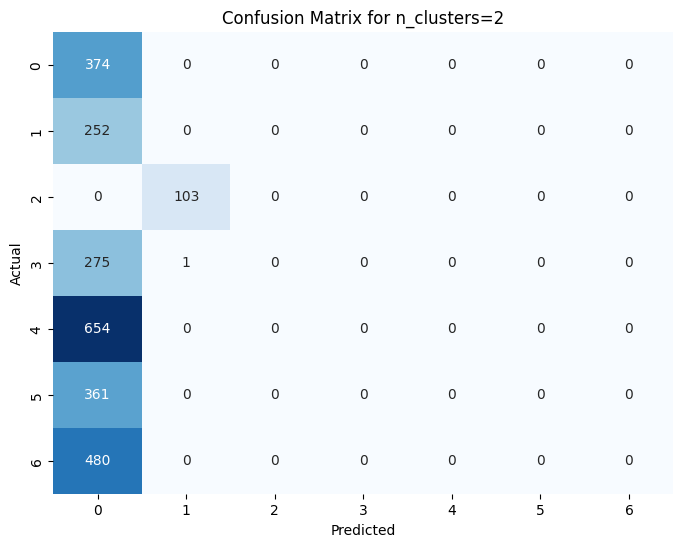

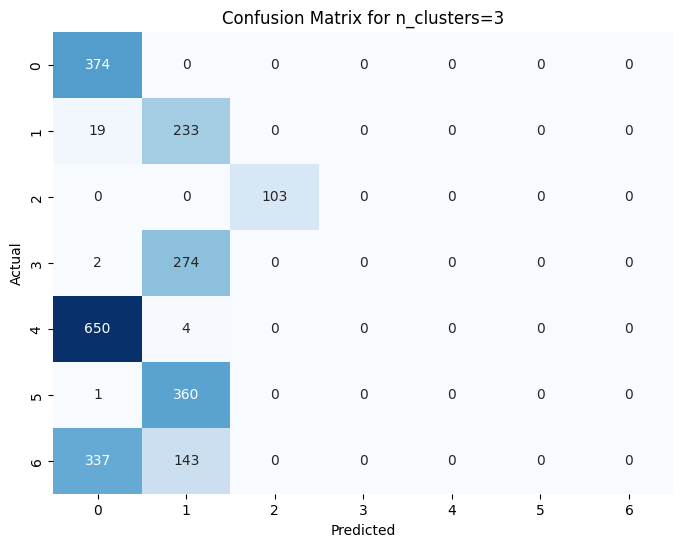

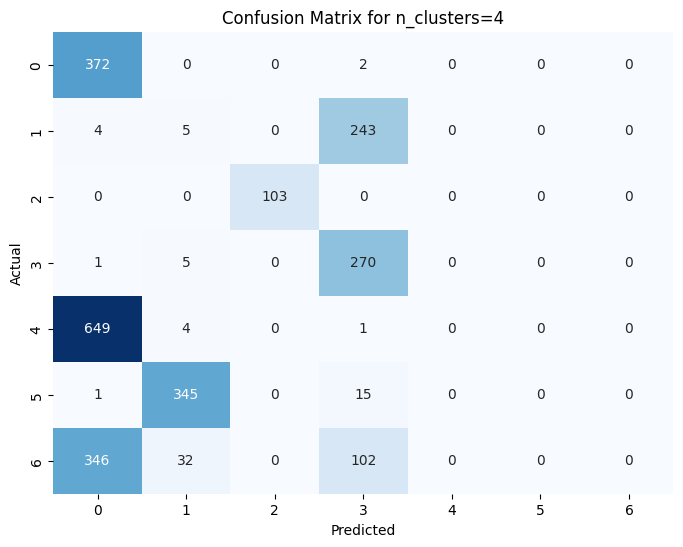

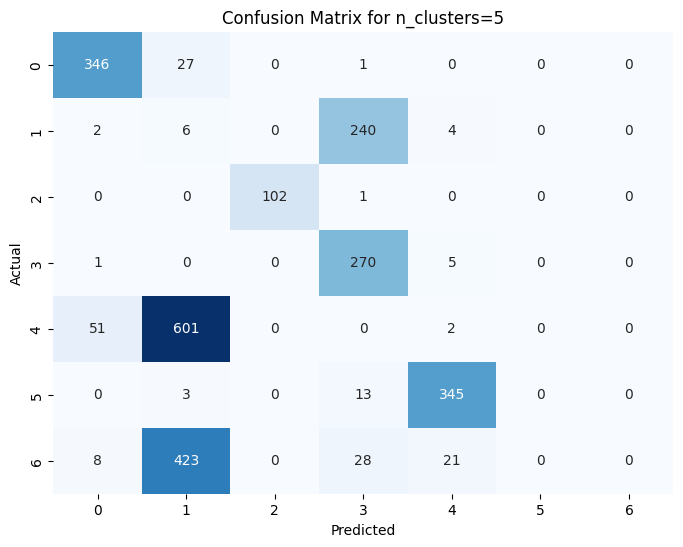

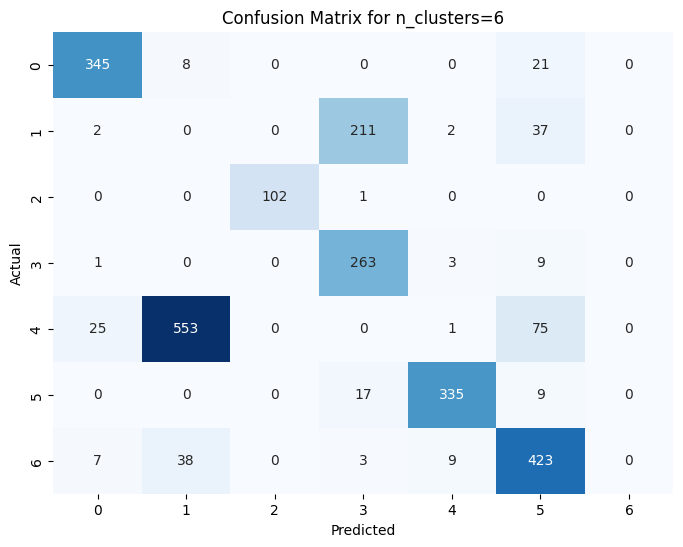

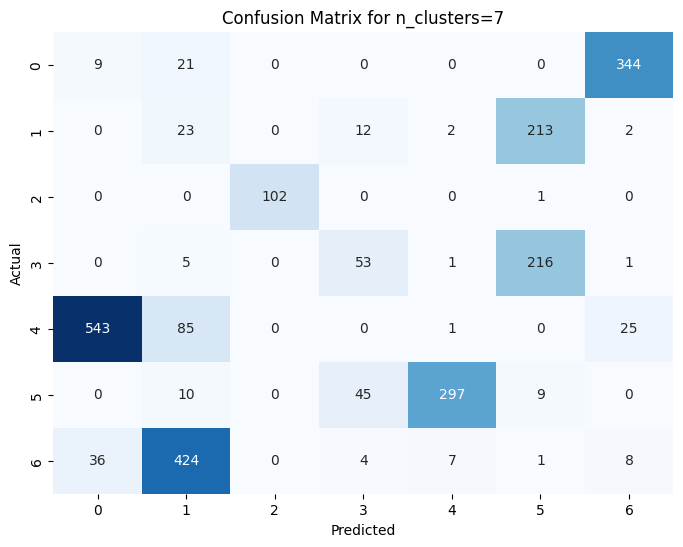

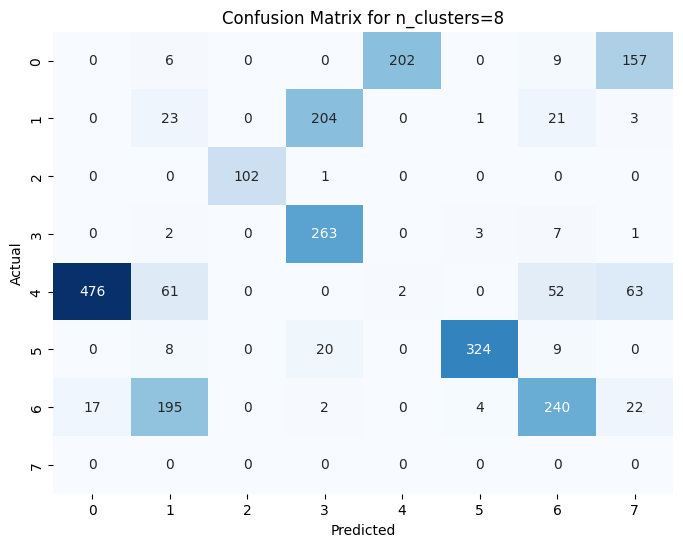

9


In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def calculate_confusion_matrix(n_clusters, predicted_labels, numClusters):
    confusion = confusion_matrix(y, predicted_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for n_clusters={n_clusters}')
    plt.savefig('Output/Dataset2/confusionMatrix_k='+str(numClusters)+'.png')    
    plt.show()
    return confusion

numClusters = 2
for n_clusters in n_clusters_values:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, init="k-means++", n_init="auto").fit(X)
    predicted_labels = kmeans.labels_
    
    confusion = calculate_confusion_matrix(n_clusters, predicted_labels, numClusters)
    numClusters += 1

